In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline


In [3]:
loan = pd.read_csv('D:\\myscripts\\data\\train_loanpred.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


# Relationship - Continuous - Bivariate

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


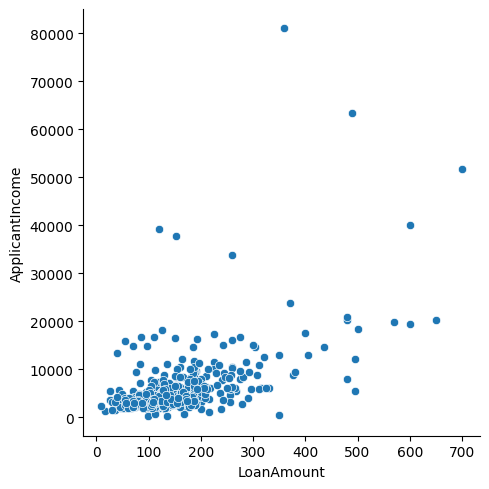

In [3]:
# scatter
sns.relplot(x="LoanAmount", y="ApplicantIncome", data=loan)

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


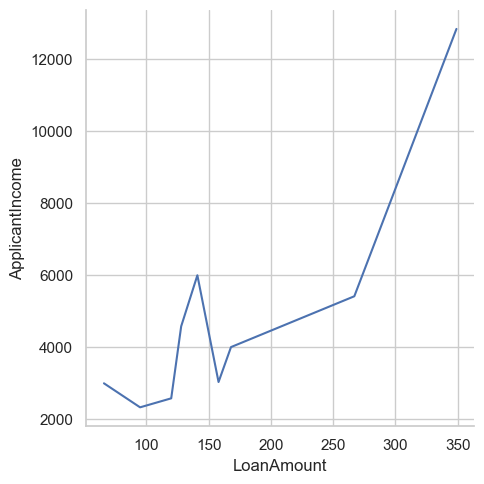

In [65]:
#line plot
x_data = loan["LoanAmount"].index
palette = sns.cubehelix_palette(light=.8, n_colors=3)
sns.relplot(x="LoanAmount", y="ApplicantIncome", kind="line", data=loan[:10])
#  palette = palette, hue="Property_Area", style="Loan_Status", errorbar="sd", estimator=None

# Relationship - Continuous - Multivariate

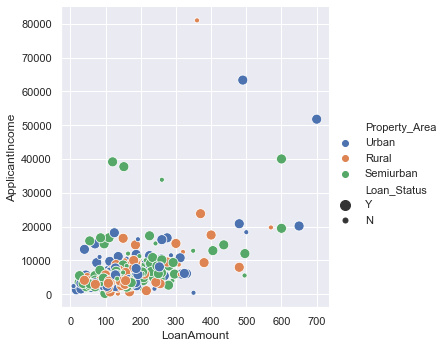

In [2]:
#scatter
sns.set(style="darkgrid")
sns.relplot(x="LoanAmount", y="ApplicantIncome", hue="Property_Area", size="Loan_Status", sizes =(25,100) , data=loan)
#style=""

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


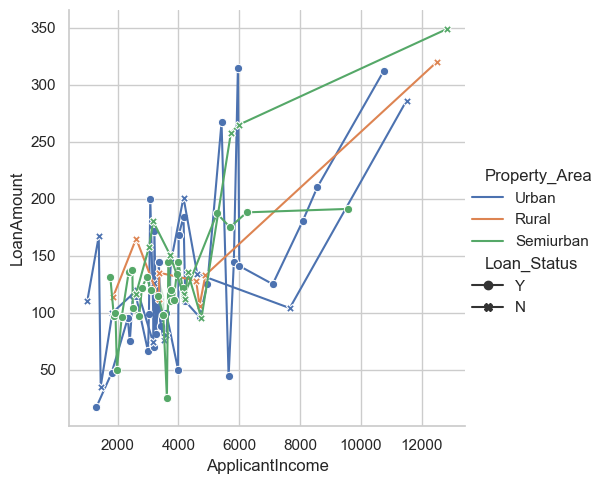

In [51]:
#line with semantics
x_data_20 = loan['LoanAmount'][:100].index
sns.relplot(x="ApplicantIncome", y="LoanAmount", hue="Property_Area", style="Loan_Status", kind="line", dashes=False, markers=True, data=loan[:100])
#estimator,ci,size

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


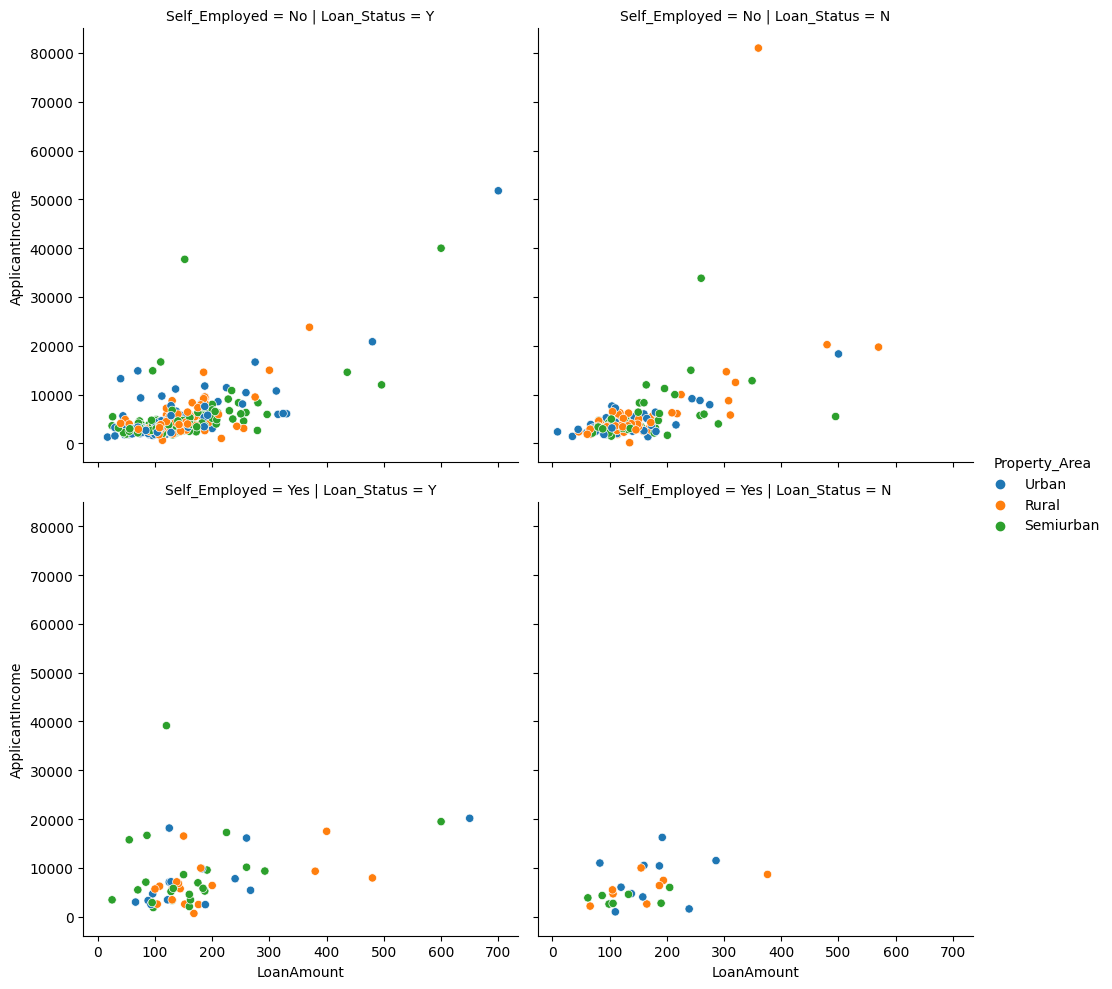

In [31]:
#multiple relationships with facets
sns.relplot(x="LoanAmount", y="ApplicantIncome", hue="Property_Area", col="Loan_Status",row="Self_Employed", kind="scatter", data =loan)
#col_wrap=5,height=3, aspect=.75, linewidth=2.5,

# Distribution - Continuous - Univariate

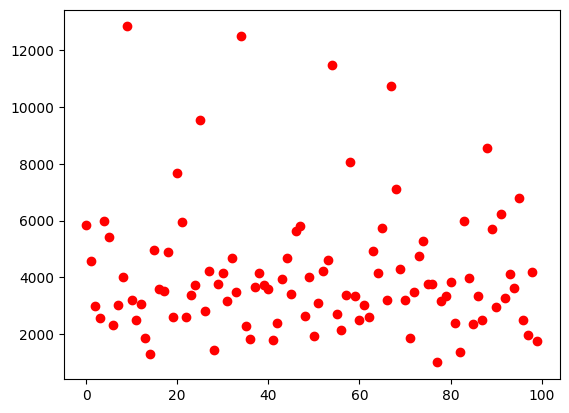

In [6]:
# Dot plot
arr = [i for i in range(0,100)]
plt.plot(loan.index.take(arr), loan["ApplicantIncome"].take(arr), 'ro')

<Axes: >

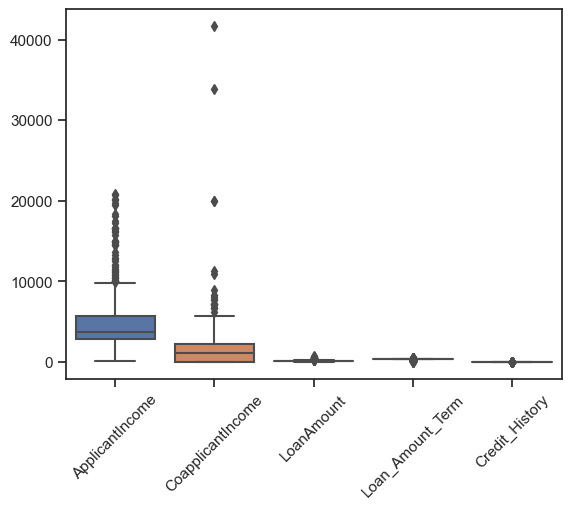

In [7]:
#Box plot
plt.xticks(rotation=45)
sns.boxplot(data =loan)

<Axes: xlabel='LoanAmount', ylabel='Count'>

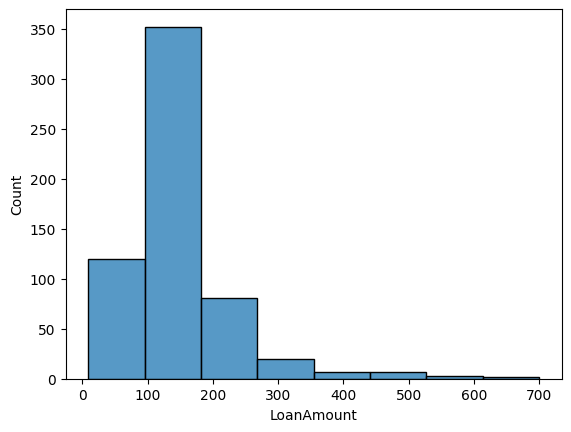

In [26]:
#Histogram
from scipy import stats
sns.histplot(loan, x="LoanAmount", bins=8)
#fit=stats.gamma

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_12396\597424818.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan.LoanAmount, bins=20, kde=False);


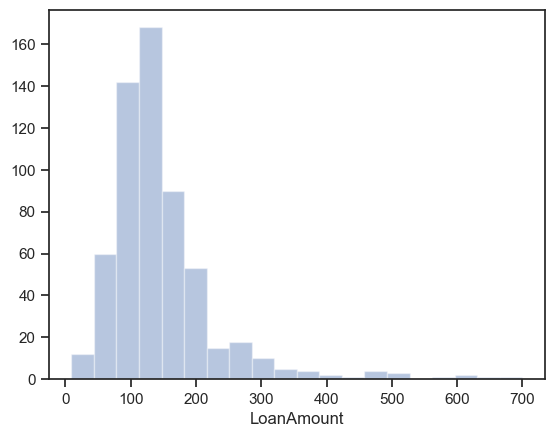

In [23]:
#histogram
sns.distplot(loan.LoanAmount, bins=20, kde=False, rug=True);
#rug plot - small vertical tick at each observation
#hist=False - kde plot
#KDE plots encode the density of observations on one axis with height along the other axis

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_53684\1411741326.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(loan.LoanAmount,bw=.2, label="bw: 0.2")
C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_53684\1411741326.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(loan.LoanAmount, bw=2, label="bw: 2")


<Axes: xlabel='LoanAmount', ylabel='Density'>

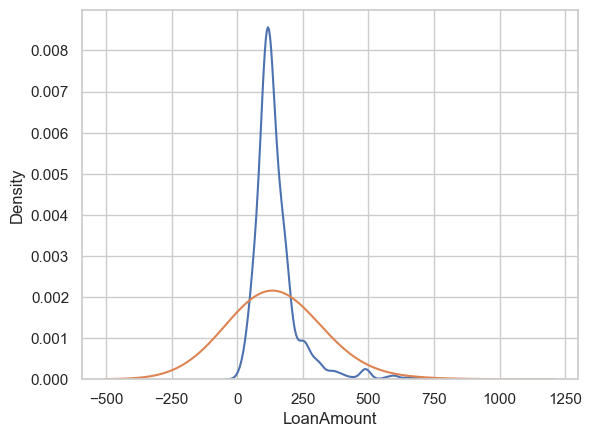

In [18]:
#KDE plot
sns.kdeplot(loan.LoanAmount,bw=.2, label="bw: 0.2")
sns.kdeplot(loan.LoanAmount, bw=2, label="bw: 2")
#bw - controls how tightly the estimation is fit to the data, much like the bin size in a histogram

# Distribution - Continuous - Bivariate

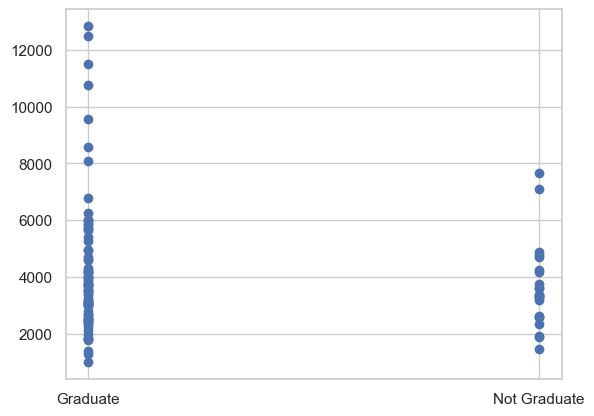

In [46]:
#Dot plot
plt.plot(loan["Education"].take(arr), loan["ApplicantIncome"].take(arr) , 'bo')

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

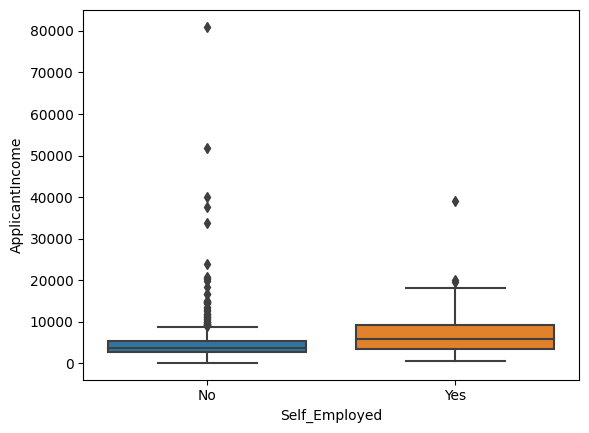

In [7]:
#Box plot
sns.boxplot(x="Self_Employed", y ="ApplicantIncome", data =loan)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

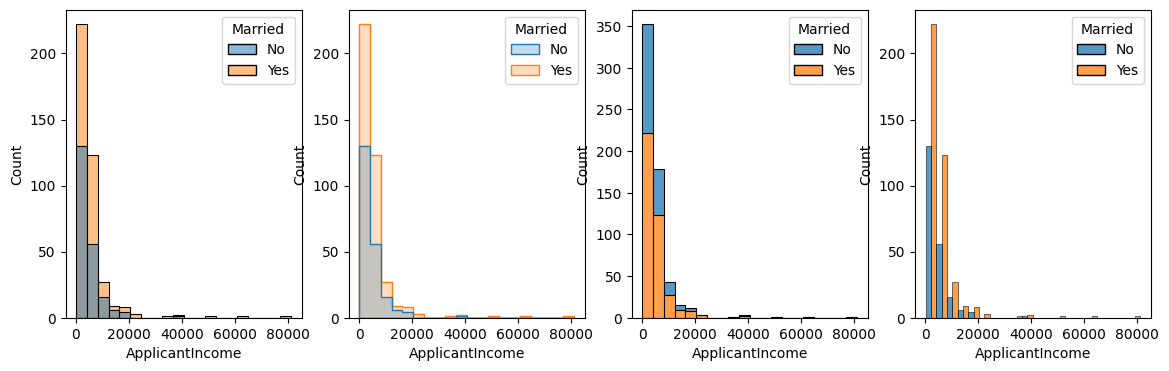

In [47]:
fig, axes = plt.subplots(1,4, figsize=(14,4))
sns.histplot(loan, x="ApplicantIncome", hue="Married", bins=20, ax=axes[0])
sns.histplot(loan, x="ApplicantIncome", hue="Married", bins=20, ax=axes[1],  element="step")
sns.histplot(loan, x="ApplicantIncome", hue="Married", bins=20, ax=axes[2],  multiple="stack")
sns.histplot(loan, x="ApplicantIncome", hue="Married", bins=20, ax=axes[3],  multiple="dodge")

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


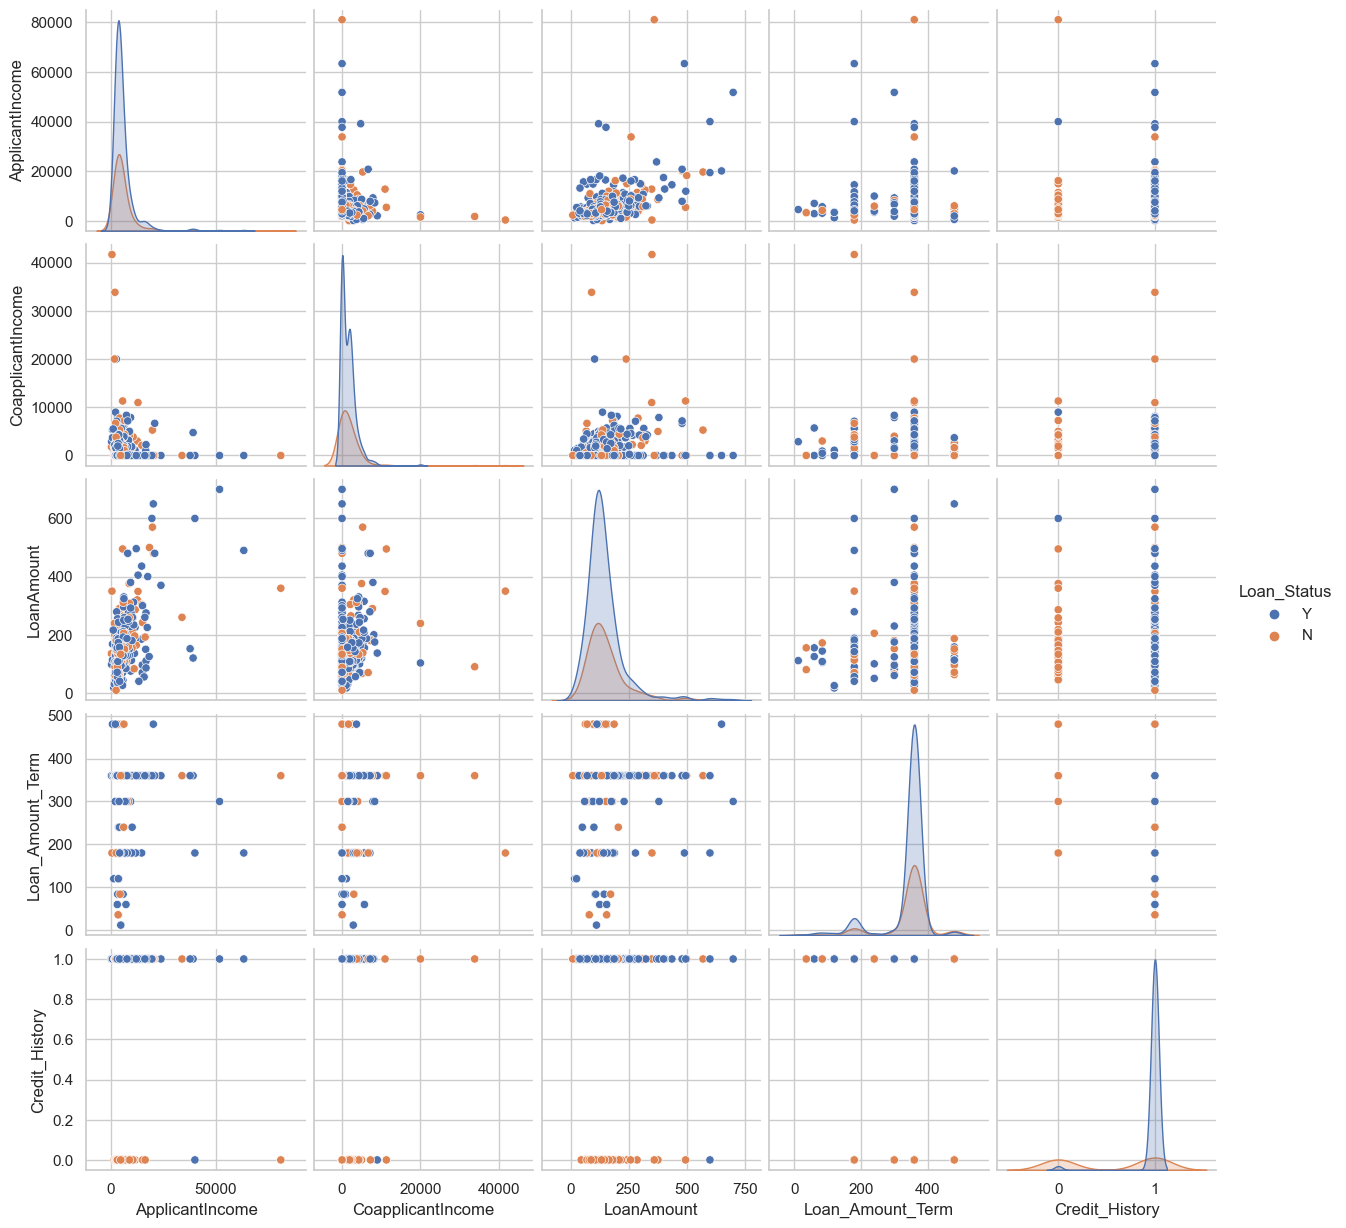

In [48]:
#Pairplot
sns.pairplot(data=loan, hue="Loan_Status")
#it also draws the univariate distribution of each variable on the diagonal axes
#hue="" parameter automatically changes the histograms to KDE plots
#built on top of a PairGrid

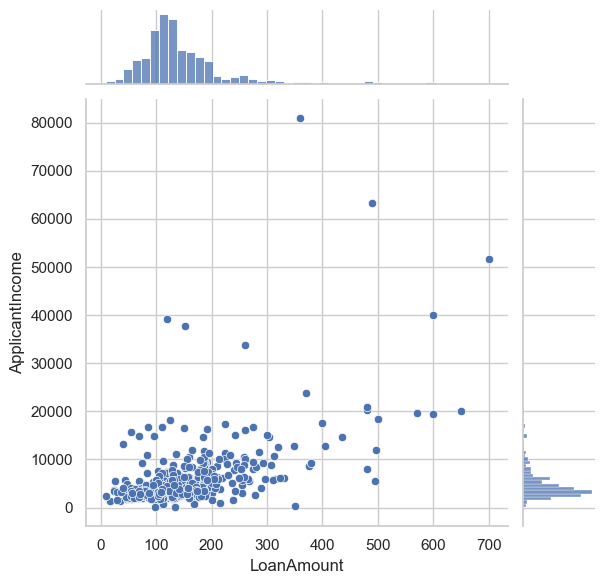

In [15]:
#Joint Plot - scatter
sns.jointplot(x ='LoanAmount', y = 'ApplicantIncome', data =loan)
#kind="hex" - hexbin plot - it shows the counts of observations that fall within hexagonal bins
#kind= "kde" - kernel density estimation - contour plot 
#Built on top of JointGrid

# Distribution - Continuous - Multivariate

# Distribution - Categorical

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Self_Employed
No     4568.307692
Yes    6988.641975
Name: ApplicantIncome, dtype: float64

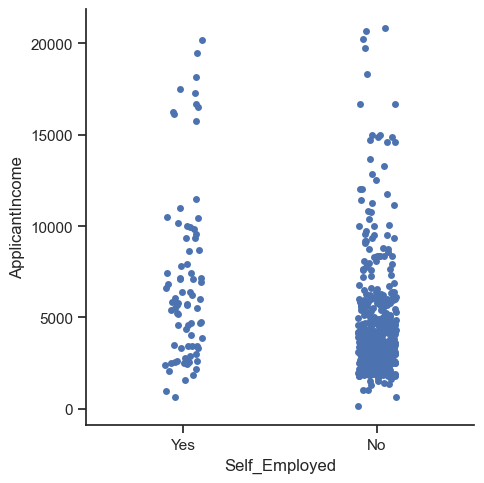

In [5]:
#scatterplot - strip plot
sns.set(style="ticks", color_codes=True)

loan["ApplicantIncome"]  = loan[(loan["ApplicantIncome"] < 23000)]["ApplicantIncome"]
sns.catplot(x="Self_Employed", y="ApplicantIncome", order=["Yes", "No"], data=loan, jitter=True)
#jitter=False

loan.groupby(by=loan['Self_Employed'])["ApplicantIncome"].mean()

<Axes: xlabel='total_bill'>

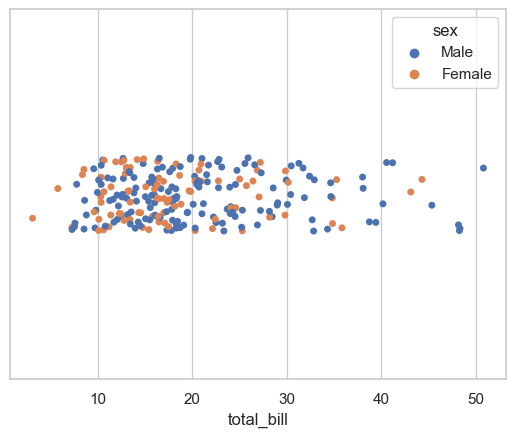

In [13]:
#Strip plot  
#swap categorcial variable to y for horizontal plot
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.stripplot(x="total_bill", hue ="sex", data =tips)

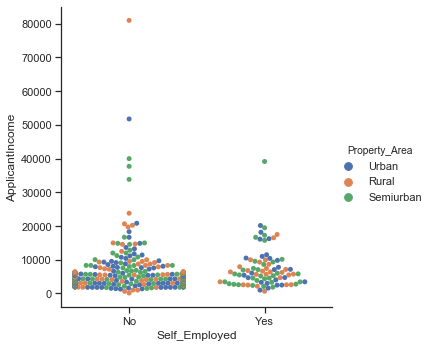

In [61]:
#Categorical scatterplot - swarm plot - adjusts the points along the categorical axis
sns.catplot(x="Self_Employed", y="ApplicantIncome", hue="Property_Area", kind='swarm', data=loan)

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


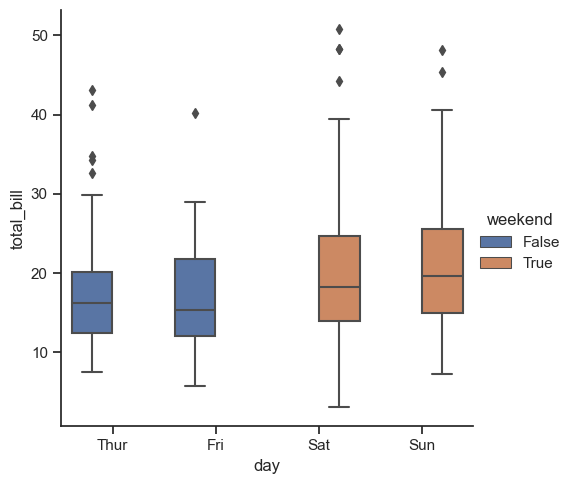

In [21]:
#Categorical - distribution of data - box plot
tips["weekend"] = tips["day"].isin(['Sat', 'Sun'])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box")

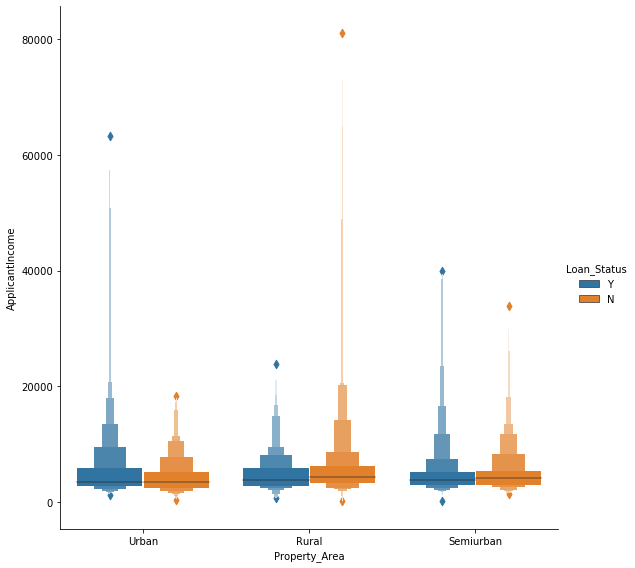

In [7]:
#Categorical - distribution of data -boxen plot
sns.catplot(x="Property_Area", y="ApplicantIncome", hue="Loan_Status", kind="boxen", data=loan, height=8)
#hue - the box for each level of the semantic variable is moved along the categorical axis
#dodge=False
#kind=boxen - showing more information about the shape of the distribution.Best suited for larger datasets


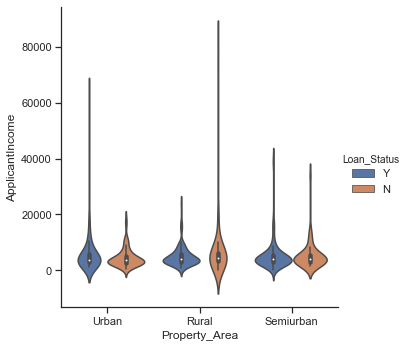

In [75]:
#Categorical - distribution of data -violin plot 
#combines a boxplot with the kernel density estimation
sns.catplot(x="Property_Area", y="ApplicantIncome", hue="Loan_Status", kind="violin", data=loan)
#bw=.15, cut=0
#split=True - split the violins when the hue parameter has only "two levels"
#inner="stick" - show each individual observation instead of the summary boxplot 
#inner="quartile" - show quartiles only 

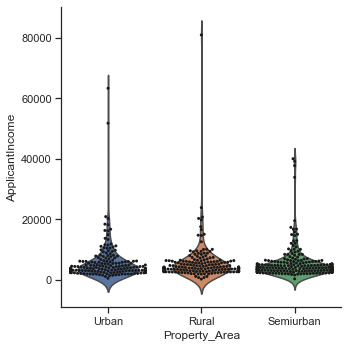

In [88]:
#Combine swarmplot() or striplot() with a box plot or violin plot
g = sns.catplot(x="Property_Area", y="ApplicantIncome", kind="violin", inner=None, data=loan)
sns.swarmplot(x="Property_Area", y="ApplicantIncome", color="k", size=3, data=loan, ax=g.ax)

# Estimate Plots

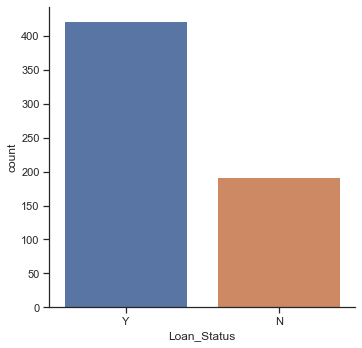

In [131]:
#Statistical estimation within categories - bar plot, count plot
#error bars - uses bootstrapping to compute a confidence interval around the estimate
#kind="count" - show the number of observations in each category
sns.catplot("Loan_Status", kind="count", data=loan)

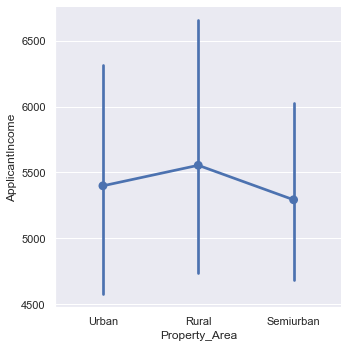

In [4]:
#Statistical estimation within categories - pointplot
sns.catplot(y="ApplicantIncome", x="Property_Area", kind="point", data=loan)
# rather than showing a full bar, it plots the point estimate and confidence interval
#connects points from the same hue category

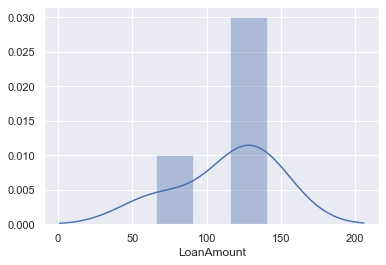

In [164]:
import statsmodels.nonparametric.api as smnp
loan5 = loan[:5]
sns.set(style='darkgrid')
kwargs = {'cumulative': True}
sns.distplot(loan5.LoanAmount)

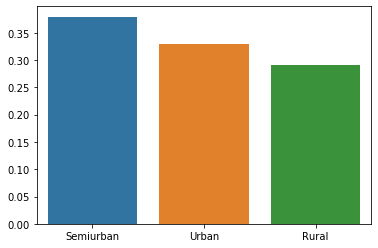

In [6]:
probabilities = loan['Property_Area'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

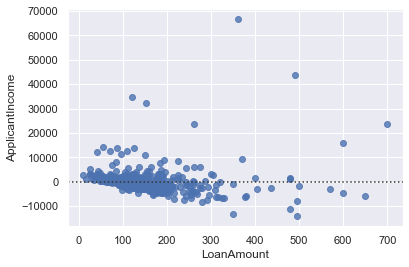

In [9]:
#Reg Plot
sns.residplot(x="LoanAmount", y="ApplicantIncome", data=loan)

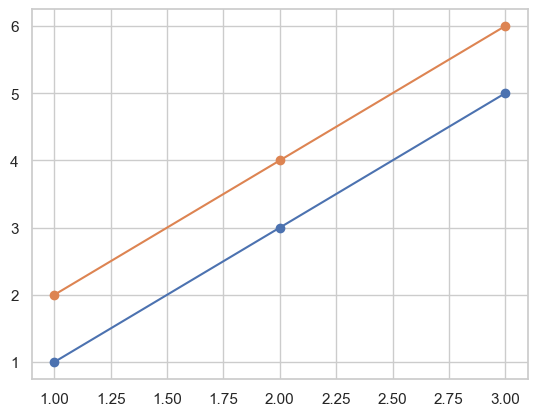

In [34]:
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y, marker='o')

In [68]:
technologies = {
    'Courses':["Spark","Spark","Spark","Spark", "Spark","Spark","Spark","Spark"],
    'Fee' :[20000,20010,20020,20030, 20040,20050,20060,20070],
    'Duration':['30days','40days','35days','50days', '30days','40days','35days','50days'],
    'Discount':[1000,2300,1200,2000, 1000,2300,1200,2000]
              }
df = pd.DataFrame(technologies)
df

,Courses,Fee,Duration,Discount
0,Spark,20000,30days,1000
1,Spark,20010,40days,2300
2,Spark,20020,35days,1200
3,Spark,20030,50days,2000
4,Spark,20040,30days,1000
5,Spark,20050,40days,2300
6,Spark,20060,35days,1200
7,Spark,20070,50days,2000


<Axes: xlabel='Courses', ylabel='Fee'>

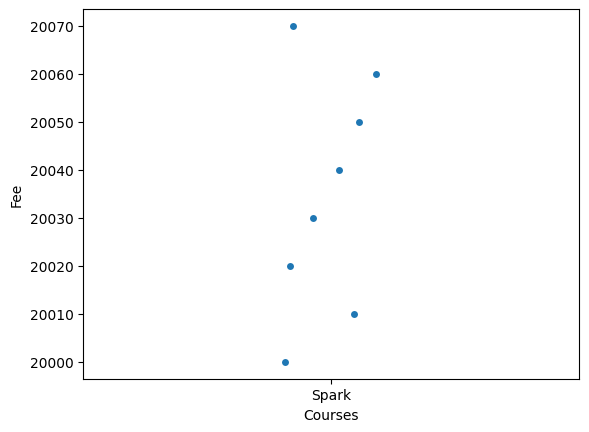

In [69]:
sns.stripplot(x="Courses", y="Fee", data=df)

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


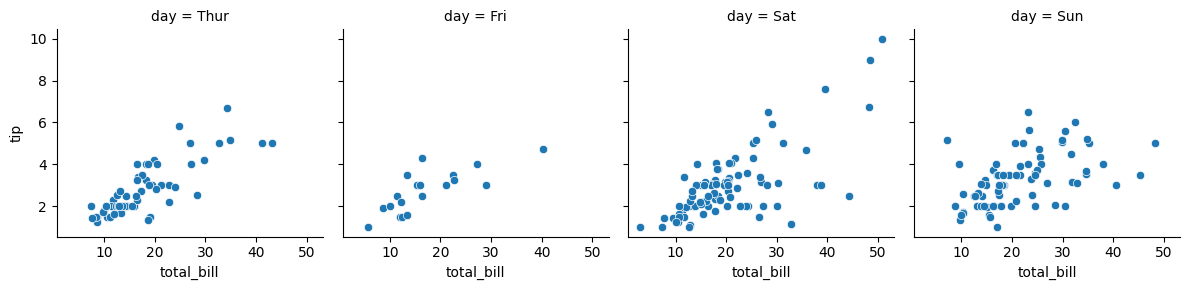

In [2]:
#Facet Grid
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="day")
g.map(sns.scatterplot, "total_bill", "tip")

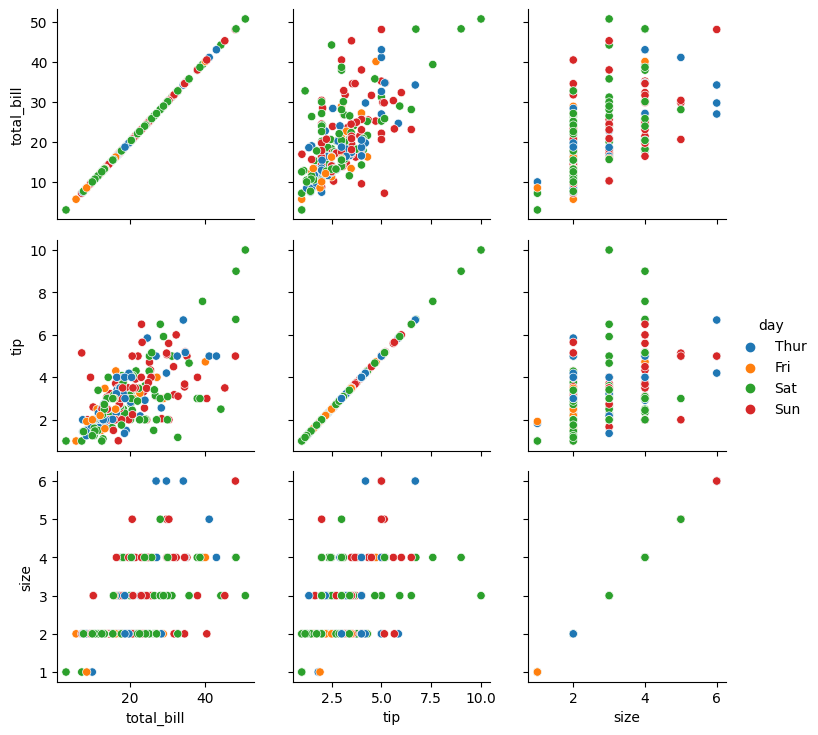

In [33]:
#Pair Grid
p = sns.PairGrid(tips, hue="day")
p.map(sns.scatterplot)
p.add_legend()

In [ ]:
#Text
#Annotate